# Dataset Loading and Imports

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      

In [ ]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
!pip install sklvq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset = load_dataset("mstz/covertype", 'covertype')["train"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/581012 [00:00<?, ? examples/s]

In [ ]:
dataset.to_csv("covertype.csv")

Creating CSV from Arrow format:   0%|          | 0/582 [00:00<?, ?ba/s]

187886567

In [ ]:
!pip install scikit-posthocs

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score, recall_score, roc_curve, auc
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression, mutual_info_regression
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [ ]:
dataset = pd.read_csv('covertype.csv')
dataset.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,...,soil_type_id_31,soil_type_id_32,soil_type_id_33,soil_type_id_34,soil_type_id_35,soil_type_id_36,soil_type_id_37,soil_type_id_38,soil_type_id_39,cover_type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,False,False,False,False,False,False,False,False,False,4
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,False,False,False,False,False,False,False,False,False,4
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,False,False,False,False,False,False,False,False,False,1
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,False,False,False,False,False,False,False,False,False,1
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,False,False,False,False,False,False,False,False,False,4


In [ ]:
dataset.groupby('cover_type').size()

cover_type
0    211840
1    283301
2     35754
3      2747
4      9493
5     17367
6     20510
dtype: int64

In [ ]:
X = dataset.drop('cover_type', axis=1)
y = dataset['cover_type']

In [ ]:
# Normalização
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

scaler_minmax = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler_minmax.fit_transform(df_scaled)

data_normalized = pd.DataFrame(data_normalized, columns=X.columns)

X = data_normalized

In [ ]:
df_scaled.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,...,soil_type_id_30,soil_type_id_31,soil_type_id_32,soil_type_id_33,soil_type_id_34,soil_type_id_35,soil_type_id_36,soil_type_id_37,soil_type_id_38,soil_type_id_39
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654


In [ ]:
data_normalized.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,...,soil_type_id_30,soil_type_id_31,soil_type_id_32,soil_type_id_33,soil_type_id_34,soil_type_id_35,soil_type_id_36,soil_type_id_37,soil_type_id_38,soil_type_id_39
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# extract all numerical features from train
num_features = X.iloc[:,0:10]

# extract all binary features from train
cat_features = X.iloc[:, 10:]

In [ ]:
X.shape

(581012, 54)

In [ ]:
# Z-score method
z_scores = np.abs(stats.zscore(num_features))
data_cleaned_zscore = num_features[(z_scores < 3).all(axis=1)]

# IQR method
Q1 = num_features.quantile(0.25)
Q3 = num_features.quantile(0.75)
IQR = Q3 - Q1
data_cleaned_iqr = num_features[~((num_features < (Q1 - 1.5 * IQR)) | (num_features > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleaned_iqr.shape


(472620, 10)

In [ ]:
X = pd.concat([data_cleaned_iqr, cat_features], axis=1).reindex(data_cleaned_iqr.index)
X.shape

(472620, 54)

In [ ]:
y = y.reindex(data_cleaned_iqr.index)
y.shape

(472620,)

In [ ]:
# Select top k features based on chi-squared test
selector = SelectKBest(f_regression, k=20)
df_selected = selector.fit_transform(X, y)

df_selected = pd.DataFrame(df_selected, columns=X.columns[selector.get_support()])

X = df_selected
X.head()

,elevation,slope,horizontal_distance_to_roadways,horizontal_distance_to_fire_points,wilderness_area_id_0,wilderness_area_id_2,wilderness_area_id_3,soil_type_id_1,soil_type_id_3,soil_type_id_5,soil_type_id_9,soil_type_id_16,soil_type_id_21,soil_type_id_22,soil_type_id_28,soil_type_id_34,soil_type_id_36,soil_type_id_37,soil_type_id_38,soil_type_id_39
0,0.513757,0.166667,0.738092,0.564757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.510755,0.257576,0.700576,0.602677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.551776,0.242424,0.831249,0.473303,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.520760,0.287879,0.730504,0.573679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.546773,0.166667,0.821273,0.489196,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Modeling

In [ ]:
# Dividir o dataset em treino+validação e teste
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dividir o conjunto de treino+validação em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42, stratify=y_temp)

print("Tamanho do conjunto de treinamento:", X_train.shape)
print("Tamanho do conjunto de validação:", X_val.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

print("Distribuição das classes no conjunto de treinamento:")
print(y_train.value_counts(normalize=True))

print("\nDistribuição das classes no conjunto de validação:")
print(y_val.value_counts(normalize=True))

print("\nDistribuição das classes no conjunto de teste:")
print(y_test.value_counts(normalize=True))


Tamanho do conjunto de treinamento: (94524, 20)
Tamanho do conjunto de validação: (283572, 20)
Tamanho do conjunto de teste: (94524, 20)
Distribuição das classes no conjunto de treinamento:
cover_type
1    0.492330
0    0.387648
2    0.043788
6    0.033462
5    0.024935
4    0.016260
3    0.001576
Name: proportion, dtype: float64

Distribuição das classes no conjunto de validação:
cover_type
1    0.492330
0    0.387651
2    0.043788
6    0.033455
5    0.024943
4    0.016257
3    0.001576
Name: proportion, dtype: float64

Distribuição das classes no conjunto de teste:
cover_type
1    0.492330
0    0.387648
2    0.043788
6    0.033462
5    0.024935
4    0.016260
3    0.001576
Name: proportion, dtype: float64


In [ ]:
import joblib

model_performance = []

def train(model_name, model, param_dist):
    # Realização da busca de hiperparâmetros
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    best_params = {}

    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=kf, random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)

    best_params = random_search.best_params_
    print(f'Best params for {model_name}: {random_search.best_params_}')

    # Avaliação no conjunto de teste
    y_pred = random_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    if model_name == 'SVM':
      predict_proba_dist = random_search.decision_function(X_test)

      pred_probability = []
      for x in predict_proba_dist:
          e_x = np.exp(x - np.max(x))
          pred_probability.append(e_x / e_x.sum(axis=0))

      roc_auc = roc_auc_score(y_test, pred_probability, multi_class='ovo')
    else:
      roc_auc = roc_auc_score(y_test, random_search.predict_proba(X_test), multi_class='ovo')

    model_performance.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Recall': recall,
        'ROC AUC': roc_auc
    })

    # Resultados obtidos
    print(f"\nModelo: {model_name}")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

def plot():
    performance_df = pd.DataFrame(model_performance)

    # Plotando as métricas de performance
    metrics = ['Accuracy', 'F1-Score', 'Recall', 'ROC AUC']
    plt.figure(figsize=(14, 8))

    for i, metric in enumerate(metrics):
        plt.subplot(2, 2, i+1)
        plt.bar(performance_df['Model'], performance_df[metric])
        plt.title(metric)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [ ]:
# KNN
train(
    'KNN',
    KNeighborsClassifier(),
    {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
)

Best params for KNN: {'weights': 'distance', 'n_neighbors': 3}

Modelo: KNN
Acurácia: 0.8869
F1-Score: 0.8866
Recall: 0.8869
ROC AUC: 0.9287


In [ ]:
# Decision Tree
train(
    'DecisionTree',
    DecisionTreeClassifier(),
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
)

Best params for DecisionTree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}

Modelo: DecisionTree
Acurácia: 0.8660
F1-Score: 0.8658
Recall: 0.8660
ROC AUC: 0.8642


In [ ]:
# Random Forest
train(
    'RandomForest',
    RandomForestClassifier(),
    {
        'n_estimators': [100, 200],
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    }
)

Best params for RandomForest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'log_loss', 'bootstrap': True}

Modelo: RandomForest
Acurácia: 0.8926
F1-Score: 0.8912
Recall: 0.8926
ROC AUC: 0.9804


In [ ]:
# LVQ
from sklvq import GLVQ

train(
    'LVQ',
    GLVQ(),
    {
        'activation_type': ["identity", "sigmoid"],
        'solver_type' :  ["sgd", "adam"]
    }
)

Best params for LVQ: {'solver_type': 'sgd', 'activation_type': 'sigmoid'}

Modelo: LVQ
Acurácia: 0.5764
F1-Score: 0.4939
Recall: 0.5764
ROC AUC: 0.8495


In [ ]:
# SVM
from sklearn.svm import LinearSVC

train(
    'SVM',
    LinearSVC(),
    {
      'C': [0.1, 1, 10, 100],
      'max_iter': [1000, 2000, 5000]
    }
)

Best params for SVM: {'max_iter': 2000, 'C': 100}

Modelo: SVM
Acurácia: 0.6839
F1-Score: 0.6722
Recall: 0.6839
ROC AUC: 0.8797


In [ ]:
# MLP
train(
    'MLP',
    MLPClassifier(),
    {
        'max_iter': [100, 200, 1000],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam']
    }
)

Best params for MLP: {'solver': 'adam', 'max_iter': 1000, 'activation': 'relu'}

Modelo: MLP
Acurácia: 0.7758
F1-Score: 0.7718
Recall: 0.7758
ROC AUC: 0.9482


In [ ]:
# Comitê de Redes Neurais Artificiais
ann_committee = VotingClassifier(estimators=[
    ('mlp1', MLPClassifier(max_iter=100, solver='adam')),
    ('mlp2', MLPClassifier(max_iter=200, solver='sgd')),
    ('mlp3', MLPClassifier(max_iter=1000, activation='tanh'))
], voting='soft')

train(
    'ANNCommittee',
    ann_committee,
    {}
)


Best params for ANNCommittee: {}

Modelo: ANNCommittee
Acurácia: 0.7623
F1-Score: 0.7551
Recall: 0.7623
ROC AUC: 0.9366


In [ ]:
# Comitê Heterogêneo
heterogeneous_committee = VotingClassifier(estimators=[
    ('KNN', KNeighborsClassifier(n_neighbors=3, weights='distance')),
    ('DT',  DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=1, max_depth=None, criterion='entropy')),
    ('RF',
     RandomForestClassifier(
        n_estimators=100,
        min_samples_split=5,
        min_samples_leaf=1,
        max_features='sqrt',
        max_depth=None,
        criterion='log_loss',
        bootstrap=True
        )
     )
], voting='soft')

train(
    'HeterogeneousCommittee',
    heterogeneous_committee,
    {}
)

Best params for HeterogeneousCommittee: {}

Modelo: HeterogeneousCommittee
Acurácia: 0.8996
F1-Score: 0.8990
Recall: 0.8996
ROC AUC: 0.9818


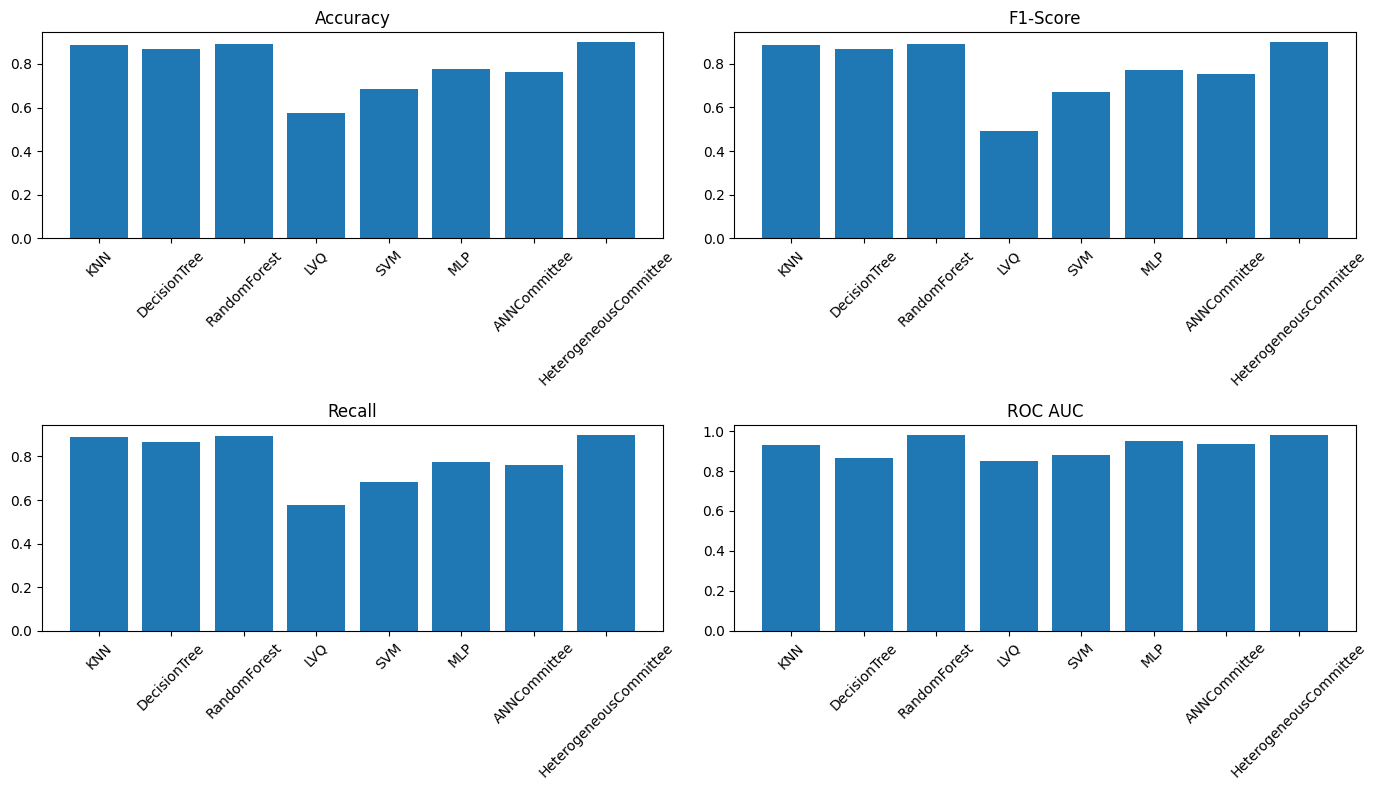

In [ ]:
plot(model_performance)


In [ ]:
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi_friedman

results = {}
for model in model_performance:
    results[model['Model']] = []
    results[model['Model']].append(model['Accuracy'])
    results[model['Model']].append(model['F1-Score'])
    results[model['Model']].append(model['Recall'])
    results[model['Model']].append(model['ROC AUC'])

results

{'KNN': [0.8869493461977911,
  0.886632797626945,
  0.8869493461977911,
  0.9287047830823608],
 'DecisionTree': [0.8660022851339343,
  0.8657734031574926,
  0.8660022851339343,
  0.8642335658033249],
 'RandomForest': [0.8926198637383098,
  0.891234462876682,
  0.8926198637383098,
  0.9803594214170592],
 'LVQ': [0.5763932969404596,
  0.49385861095195316,
  0.5763932969404596,
  0.8495160633578323],
 'SVM': [0.6839109644111548,
  0.6721666125980136,
  0.6839109644111548,
  0.8797474633079154],
 'MLP': [0.7758135499978841,
  0.7717993214512785,
  0.7758135499978841,
  0.9482090062300819],
 'ANNCommittee': [0.7622508569252253,
  0.7550510639543404,
  0.7622508569252253,
  0.9366399689424754],
 'HeterogeneousCommittee': [0.8995599001311836,
  0.8989782450641378,
  0.8995599001311836,
  0.9818045975456762]}

In [ ]:
# Aplicando o teste de Friedman
friedman_stat, friedman_p = friedmanchisquare(*results.values())
print(f'Teste de Friedman: estatística={friedman_stat}, p-valor={friedman_p}')

Teste de Friedman: estatística=25.25, p-valor=0.0006851156993184877


In [ ]:
# Aplicando o teste de Nemenyi
dt = pd.DataFrame(results.values(), columns=['Accuracy', 'F1-Score', 'Recall', 'ROC AUC'], index=results.keys())

dt.head()

,Accuracy,F1-Score,Recall,ROC AUC
KNN,0.886949,0.886633,0.886949,0.928705
DecisionTree,0.866002,0.865773,0.866002,0.864234
RandomForest,0.892620,0.891234,0.892620,0.980359
LVQ,0.576393,0.493859,0.576393,0.849516
SVM,0.683911,0.672167,0.683911,0.879747


In [ ]:
nemenyi_results = posthoc_nemenyi_friedman(dt.T)
nemenyi_results

,KNN,DecisionTree,RandomForest,LVQ,SVM,MLP,ANNCommittee,HeterogeneousCommittee
KNN,1.000000,0.900000,0.900000,0.156455,0.557628,0.900000,0.900000,0.816508
DecisionTree,0.900000,1.000000,0.730216,0.557628,0.900000,0.900000,0.900000,0.374603
RandomForest,0.900000,0.730216,1.000000,0.012452,0.110246,0.816508,0.469509,0.900000
LVQ,0.156455,0.557628,0.012452,1.000000,0.900000,0.469509,0.816508,0.001374
SVM,0.557628,0.900000,0.110246,0.900000,1.000000,0.900000,0.900000,0.020322
MLP,0.900000,0.900000,0.816508,0.469509,0.900000,1.000000,0.900000,0.469509
ANNCommittee,0.900000,0.900000,0.469509,0.816508,0.900000,0.900000,1.000000,0.156455
HeterogeneousCommittee,0.816508,0.374603,0.900000,0.001374,0.020322,0.469509,0.156455,1.000000


# Evaluation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# Treinando uma árvore de decisão para visualização
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)

# Exportando a árvore de decisão para visualização
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=[
                                '1 - Spruce/Fi',
                                '2 - Lodgepole Pine',
                                '3 - Ponderosa Pine',
                                '4 - Cottonwood/Willow',
                                '5 - Aspen',
                                '6 - Douglas-fir',
                                '7 - Krummholz'
                            ],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")


'decision_tree.pdf'